## Intro to language modeling: building makemore

From YouTube video: https://www.youtube.com/watch?v=PaCmpygFfXo by @AndrejKarpathy

#### Library imports

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

#### Data import and cleaning

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
bigram_list = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigram_list[bigram] = bigram_list.get(bigram, 0) + 1

In [4]:
# sorted from the most frequent ones to the least frequent ones with '-'
sorted(bigram_list.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

#### Data visualization

In [5]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [6]:
chars = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i,s in enumerate(chars)}
s_to_i['.'] = 0
i_to_s = {i:s for s,i in s_to_i.items()}

In [7]:
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        N[ix1, ix2] += 1

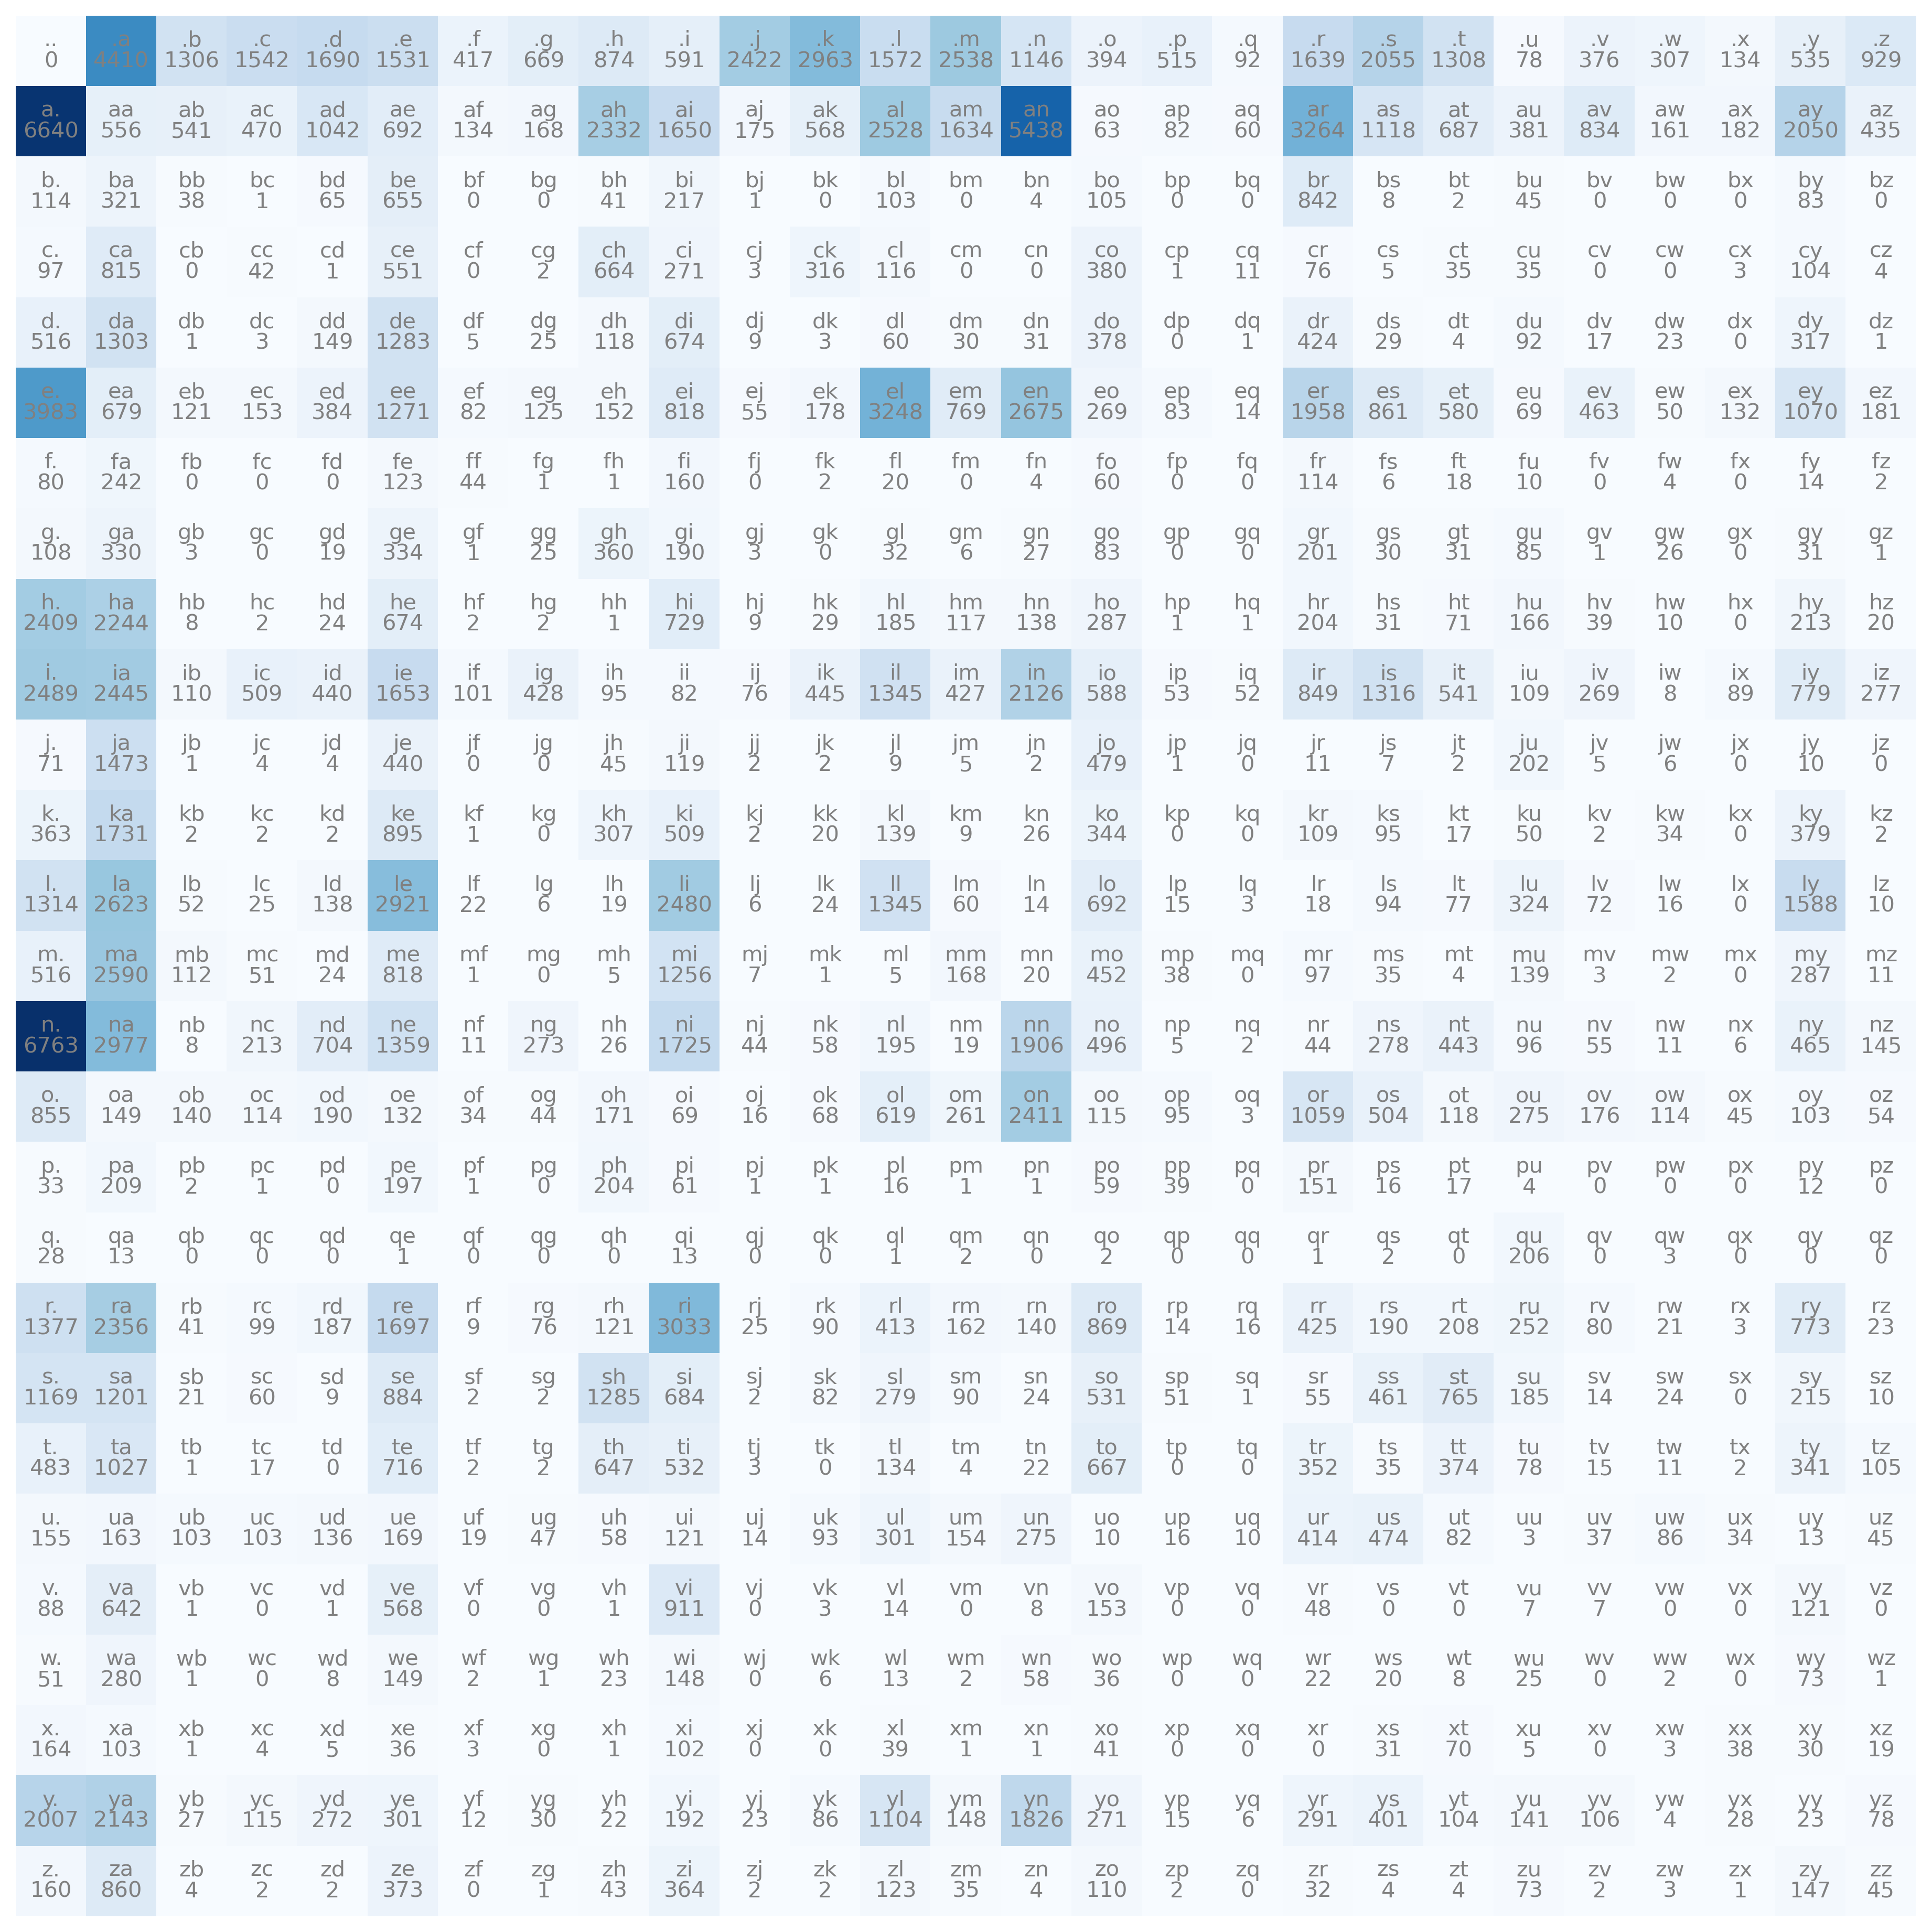

In [8]:
plt.figure(figsize=[16,16],dpi=300)
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = i_to_s[i] + i_to_s[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
        
plt.axis('off');

In [9]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [10]:
prob = N[0].float()
prob = prob / prob.sum()
prob

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [61]:
generate = torch.Generator().manual_seed(2147483647)
prob = torch.rand(3, generator=generate)
prob = prob / prob.sum()
prob

tensor([0.6064, 0.3033, 0.0903])

In [62]:
torch.multinomial(prob, num_samples=100, replacement=True, generator=generate)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [63]:
prob.shape

torch.Size([3])

#### Create a matrix for the starting letter

In [64]:
# 27, 27
# 27,  1    # 27*1 array

In [65]:
P = (N+1).float()
# N+1 makes '0 unlikely' events disappear
P /= P.sum(1, keepdim=True)

In [66]:
P[0].sum()
# Expected to be one, since it's normalized

tensor(1.)

In [67]:
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=generate).item()
        out.append(i_to_s[ix])

        if ix == 0:
            break
    print(''.join(out))

sadata.
bh.
matt.
jeeve.
steh.


In [68]:
log_likelihood = 0.0
n = 0

for word in words[:3]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f}  {logprob:.4f}')
        
print(f'{log_likelihood=}')

# negative log_likelihood; loss function
nll = -log_likelihood
print(f'{nll=}')

# normalize them
# get the average instead of the sum
print(f'{nll/n}')
# ^ loss function

log_likelihood=tensor(-38.8086)
nll=tensor(38.8086)
2.4255354404449463


In [69]:
1/27.0
# probabilities larger than 1/27.0 mean that we learned things

0.037037037037037035

In [70]:
# larger MLE means higher quality / better model
# product will be very small, so people work with the log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

# cause log is monotonic
# max the log likelihood = min the negative log likelihood

#### Alternative approach with neural network

In [71]:
# gradient based optimization

In [72]:
# compile the training set of bigrams (x,y)
xs, ys = [], []
# inputs and labels


for word in words[:1]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [73]:
xs #integer index

tensor([ 0,  5, 13, 13,  1])

In [74]:
ys

tensor([ 5, 13, 13,  1,  0])

In [75]:
# one hot encoding for neural net

import torch.nn.functional as F

# x encoded
xenc = F.one_hot(xs, num_classes = 27).float()

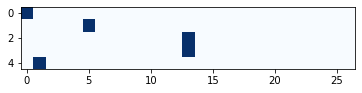

In [76]:
# xenc.shape
plt.imshow(xenc, cmap = "Blues")

In [77]:
xenc.dtype
# float can fit into neural nets
# after the one-hot encoding, the dtype is the same as the xs input
# as one-hot encoding doesn't support casting dtype inside
# I should use .float() after getting it encoded

torch.float32

In [78]:
W = torch.randn((27,27))

In [79]:
xenc @ W

tensor([[-0.7563,  0.6505,  1.7866, -0.6634,  0.4351,  0.6738, -1.1622, -0.2213,
         -0.1917,  0.5068,  0.3269, -1.6387,  1.1026,  0.4551, -0.6066, -0.0070,
          0.0446,  0.3639, -0.0599,  1.2011, -1.6605,  1.8596,  0.2359,  1.5969,
          0.2003,  0.6184,  0.9018],
        [ 0.1813,  1.8116,  0.5036,  0.3380, -0.4693,  1.2359,  1.2141,  0.0291,
         -1.3474, -0.4868,  0.3803,  0.2525, -1.3475,  1.1694,  0.8474, -1.1692,
         -1.0250, -0.3557, -0.6591, -0.3465, -2.5568, -0.7179,  0.9606,  0.4435,
          0.5892, -0.2805,  1.6733],
        [ 1.6176, -1.4218, -1.0859,  0.3901,  0.1507, -0.3888,  0.3130,  0.8235,
          0.5373, -1.7431,  2.5697, -0.1857, -0.4698,  0.5140, -0.3694, -0.3346,
         -0.1325, -0.8756, -1.5179, -1.5121, -0.4321, -1.7745,  0.7758, -1.6238,
          0.1484,  1.5972,  0.8450],
        [ 1.6176, -1.4218, -1.0859,  0.3901,  0.1507, -0.3888,  0.3130,  0.8235,
          0.5373, -1.7431,  2.5697, -0.1857, -0.4698,  0.5140, -0.3694, -0.3346

In [80]:
# @ is the matrix multiplication in PyTorch
# (5,27) @ (27,27) -> (5,27)
# 5 activations

In [81]:
# SUMMARY ---------------------------->>>>>

In [82]:
(xenc @ W).exp()
# negative nums -->   < 1
# positive nums -->   > 1 to inf

tensor([[ 0.4694,  1.9166,  5.9690,  0.5151,  1.5451,  1.9617,  0.3128,  0.8015,
          0.8255,  1.6599,  1.3867,  0.1942,  3.0121,  1.5763,  0.5452,  0.9930,
          1.0456,  1.4389,  0.9419,  3.3239,  0.1900,  6.4212,  1.2660,  4.9377,
          1.2217,  1.8559,  2.4640],
        [ 1.1987,  6.1205,  1.6547,  1.4022,  0.6255,  3.4416,  3.3674,  1.0295,
          0.2599,  0.6146,  1.4627,  1.2872,  0.2599,  3.2200,  2.3335,  0.3106,
          0.3588,  0.7007,  0.5173,  0.7072,  0.0776,  0.4878,  2.6133,  1.5582,
          1.8025,  0.7554,  5.3299],
        [ 5.0410,  0.2413,  0.3376,  1.4772,  1.1626,  0.6779,  1.3675,  2.2784,
          1.7114,  0.1750, 13.0619,  0.8305,  0.6251,  1.6720,  0.6911,  0.7156,
          0.8759,  0.4166,  0.2192,  0.2204,  0.6491,  0.1696,  2.1723,  0.1971,
          1.1600,  4.9391,  2.3279],
        [ 5.0410,  0.2413,  0.3376,  1.4772,  1.1626,  0.6779,  1.3675,  2.2784,
          1.7114,  0.1750, 13.0619,  0.8305,  0.6251,  1.6720,  0.6911,  0.7156

In [83]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True) 
# probability for next character
# softmax <-- activation func (last 2 lines)
# put on linear layer

In [84]:
probs.shape

torch.Size([5, 27])

In [85]:
nlls = torch.zeros(5)
# checking "emma"

for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    
    print('-------------')
    print(f'bigram example {i+1}: {i_to_s[x]} {i_to_s[y]}  (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    
    p = probs[i,y]
    print('probability assigned by the net to the correct character:', p.item())
    
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print('=============')
print('Average -log likelihood, i.e. loss =', nlls.mean().item())

-------------
bigram example 1: . e  (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0096, 0.0393, 0.1223, 0.0106, 0.0317, 0.0402, 0.0064, 0.0164, 0.0169,
        0.0340, 0.0284, 0.0040, 0.0617, 0.0323, 0.0112, 0.0204, 0.0214, 0.0295,
        0.0193, 0.0681, 0.0039, 0.1316, 0.0259, 0.1012, 0.0250, 0.0380, 0.0505])
label (actual next character): 5
probability assigned by the net to the correct character: 0.04020611196756363
log likelihood: -3.2137362957000732
negative log likelihood: 3.2137362957000732
-------------
bigram example 2: e m  (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0276, 0.1407, 0.0380, 0.0322, 0.0144, 0.0791, 0.0774, 0.0237, 0.0060,
        0.0141, 0.0336, 0.0296, 0.0060, 0.0740, 0.0536, 0.0071, 0.0082, 0.0161,
        0.0119, 0.0163, 0.0018, 0.0112, 0.0601, 0.0358, 0.0414, 0.0174, 0.1225])
label (actual next character): 13
probability assigned by the net to the correct cha

In [87]:
# ---------- !!! OPTIMIZATION !!! ---------- #
# now need to optimize W to minimize the loss
# step by step

In [88]:
xs

tensor([ 0,  5, 13, 13,  1])

In [89]:
ys

tensor([ 5, 13, 13,  1,  0])

In [110]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [138]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to nn: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # prob for next character

loss = -probs[torch.arange(5), ys].log().mean()

In [139]:
print(loss.item())

3.6493873596191406


In [140]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [141]:
# update
W.data += -0.1 * W.grad

In [158]:
# ---------- !!! OPTIMIZATION !!! ---------- #

In [159]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [163]:
# Regularization (push W to be 0) 
# = adding counts while smoothing it at the beginning
(W**2).mean()

tensor(1.6880, grad_fn=<MeanBackward0>)

In [166]:
# gradient descent
for k in range(100):
    
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to nn: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # prob for next character

    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update
    W.data += -50 * W.grad

2.72300124168396
2.6820788383483887
2.6542155742645264
2.6333680152893066
2.617053985595703
2.6038622856140137
2.592928886413574
2.5836946964263916
2.5757763385772705
2.5689024925231934
2.5628726482391357
2.557537317276001
2.55277943611145
2.548509120941162
2.54465389251709
2.5411553382873535
2.53796648979187
2.5350472927093506
2.532365560531616
2.529893398284912
2.5276079177856445
2.52548885345459
2.5235190391540527
2.521683931350708
2.5199697017669678
2.5183663368225098
2.5168633460998535
2.515451669692993
2.5141239166259766
2.5128726959228516
2.511692523956299
2.5105772018432617
2.509521961212158
2.5085225105285645
2.5075743198394775
2.506674289703369
2.5058186054229736
2.505004405975342
2.5042288303375244
2.5034894943237305
2.50278377532959
2.5021097660064697
2.5014657974243164
2.5008492469787598
2.5002591609954834
2.4996938705444336
2.4991514682769775
2.498631477355957
2.4981322288513184
2.497652292251587
2.4971911907196045
2.4967474937438965
2.4963204860687256
2.4959092140197754


In [167]:
# sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # ---------
        # BEFORE:
        # p = P[ix]
        # ---------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        # ---------
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(i_to_s[ix])
        if ix == 0:
            break
        
    print(''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
